## BME 231 Homework 3 2024



For this homework, we will work with a dataset to try out our data analysis techniques. 

This dataset was created from a study in a dermatology department.  The database contains 34 attributes.  Of these, 33 are linear-valued from 0 to 3, and one (Age) is a range of values. It is not critical for us to know exactly what the values 0, 1, 2 and 3 represent in the attributes.  It is sufficient to know that 0 means the feature was not present, 3 means the largest amount possible, and 1 and 2 are intermediate values. 

Here are the attributes:

Clinical attributes:

| Attribute      | Description                                       |
|---------------|---------------------------------------------------|
| 1    | erythema     |
| 2 | scaling |
| 3    | definite borders               |
| 4 | itching        |
| 5 | Koebner phenomenon |
| 6 | polygonal papules |
| 7 | follicular papules |
| 8 | oral mucosal involvements |
| 9 | knee and elbow involvement |
| 10 | scalp involvement |
| 11 | family history (0 or 1) |
| 34 | age |

Histopathological attributes:

| Attribute      | Description                                       |
|---------------|---------------------------------------------------|
| 12 | melanin incontinence |
| 13 | eosinophils in the infiltrate |
| 14 | PNL infiltrate |
| 15 | fibrosis of the papillary dermis |
| 16 | exocytosis |
| 17 | acanthosis |
| 18 | hyperkeratosis |
| 19 | parakeratosis |
| 20 | clubbing of the rete ridges |
| 21 | elongation of the rete ridges |
| 22 | thinning of the suprapapillary epidermis |
| 23 | spongiform pustule |
| 24 | Munro microabcess |
| 25 | focal hypergranulosis |
| 26 | disappearance of the granular layer |
| 27 | vacuolization and damage of basal layer |
| 28 | spongiosis |
| 29 | sawtooth appearance of retes |
| 30 | follicular horn plug |
| 31 | perifollicular parakeratosis |
| 32 | inflammatory mononuclear infiltrate |
| 33 | band-like infiltrate |


It is very difficult to diagnose erythemato-squamous diseases in dermatology.  They all present with erythema (patchy redness on the skin) and scaling, with few distinguishing characteristics. A biopsy is usually required for diagnosis, but even then the diseases share many histopathological features (tissue changes seen under a microscope) as well. In addition, some diseases may show some features at one stage and different features at another stage.

For this dataset, patients were evaluated on the 12 clinical features.  Additionally, skin samples were taken for the 22 histopathological features. The final column, "Disease", is the diagnosis.  This will be our class label.  The diseases are:

| Class label     | Disease                                       |
|---------------|---------------------------------------------------|
| 1 | psoriasis |
| 2 | seborrheic dermatitis |
| 3 | lichen planus |
| 4 | pityriasis rosea |
| 5 | chronic dermatitis |
| 6 | pityriasis rubra pilaris | 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Question 1 (10 pts)

Load the file 'dermatology.csv' and view it.  Gather and show preliminary data about its size and data types.

Solution:

In [4]:
derm_data = pd.read_csv('dermatology.csv')
print(derm_data.shape) # shape also expressed in .info()
# print(derm_data.dtypes) <-- included in .info() later
# derm_data.head() <-- visualizing dataframe
derm_data.info() # syntax obtained from https://www.geeksforgeeks.org/python-pandas-dataframe-info/
derm_data.describe()

(366, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Erythema          366 non-null    int64 
 1   Scathing          366 non-null    int64 
 2   Definite Borders  366 non-null    int64 
 3   Itching           366 non-null    int64 
 4   Koebner           366 non-null    int64 
 5   Polygonal         366 non-null    int64 
 6   Follicular        366 non-null    int64 
 7   Oral              366 non-null    int64 
 8   Knee              366 non-null    int64 
 9   Scalp             366 non-null    int64 
 10  Family Hostory    366 non-null    int64 
 11  Melanin           366 non-null    int64 
 12  Eosinophils       366 non-null    int64 
 13  PNL               366 non-null    int64 
 14  Fibrosis          366 non-null    int64 
 15  Exocytosis        366 non-null    int64 
 16  Acanothosis       366 non-null    int64 
 17  Hyperk

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Focal,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Disease
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [5]:
derm_data

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


Attribute 33, "Age", is of type 'object'.  Find out why that is, and correct any and all problems so that attribute "Age" is of type int64.  State what you did. Show that the dataset is free of null values and of datatype int64.

Solution:

In [6]:
print(np.unique(derm_data['Age'])) #.unique syntax obtained form https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
# '?' string is causing the datatype issue 
derm_data['Age'] = derm_data['Age'].replace('?', np.nan)
print(derm_data['Age'].isnull().sum()) # seeing how many rows have unknown age and, therefore, compromised data
# considered replacing 8 unknown ages with mean age of dataset, however, unless the data is uniformly and symertically distributed, this could tampper with meanigful variable relationships later. 
#Therefore, I believe forgoing the data associated with unknown ages sohuld not be considered, given that doing so still results in losts of reference data. 
derm_data.dropna(subset = ['Age'], inplace = True) # removing compromised data based on unknown ages
derm_data['Age'] = derm_data['Age'].astype('Int64') # converting any stringed numbers to integer datatype as requested
print(np.unique(derm_data['Age']))
print(derm_data.info()) 

['0' '10' '12' '13' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53'
 '55' '56' '57' '58' '60' '61' '62' '63' '64' '65' '67' '68' '7' '70' '75'
 '8' '9' '?']
8
[0 7 8 9 10 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 55 56 57 58
 60 61 62 63 64 65 67 68 70 75]
<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Erythema          358 non-null    int64
 1   Scathing          358 non-null    int64
 2   Definite Borders  358 non-null    int64
 3   Itching           358 non-null    int64
 4   Koebner           358 non-null    int64
 5   Polygonal         358 non-null    int64
 6   Follicular        358 non-null    int64
 7   Or

# Question 2 (10 pts)

Perform a preliminary visualization of the data by showing histograms of each attribute. Then answer the following questions:

1. Which disease is most common?

2. What is the general shape of the Age distribution?

3. Do you think a pairplot would show useful relationships?  Why or why not?  (You may produce a pairplot if you wish, to support your answer.)

Solution:

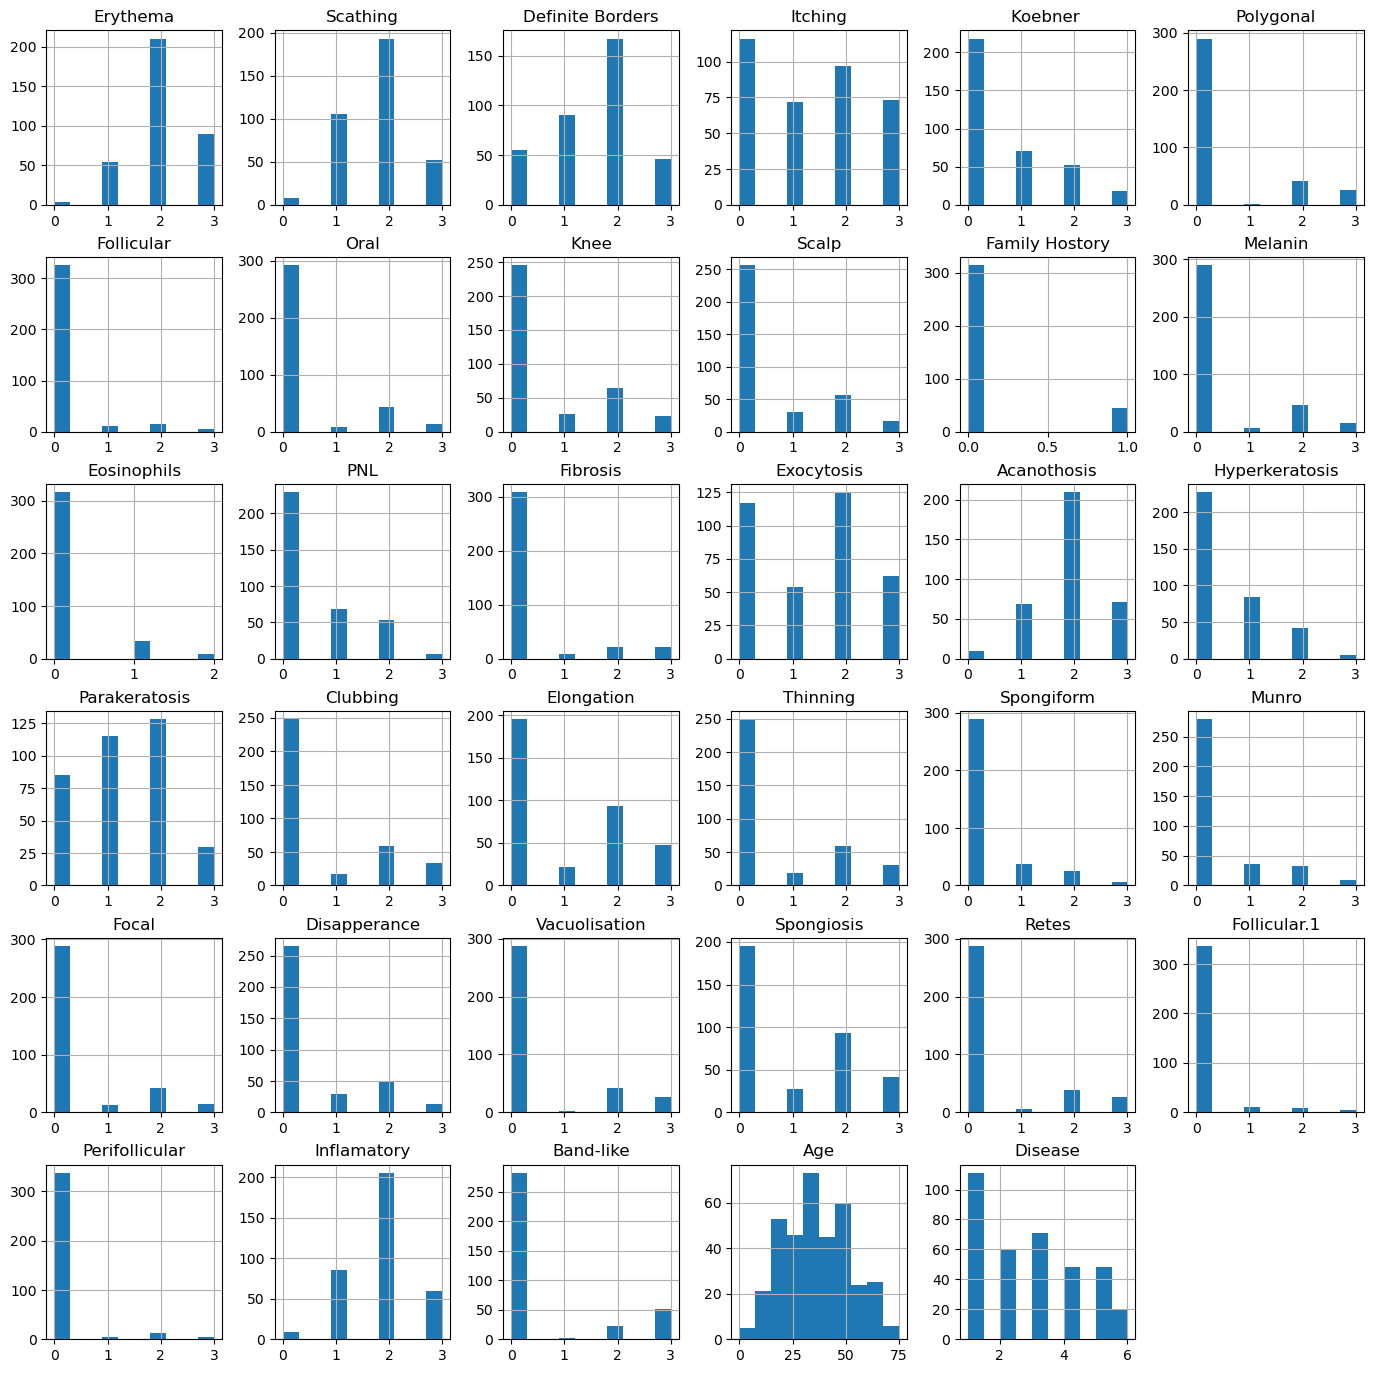

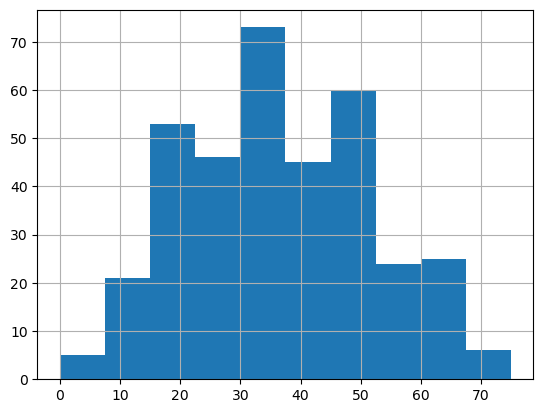

0.0020117422100156546
0.9864804148674011


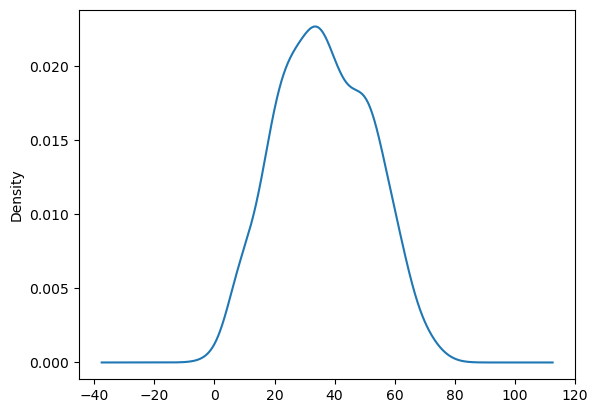

In [7]:
#0:
derm_data.hist(figsize = (17, 17)) # needed to make figures larger to read, 
plt.show()

#1: 
# based on the 'Desease' attribute histogram, the number 1 appears the most in the dataset. 
# 1 corresponds to the diagnosis psoriasis, thereby making psoriasis the most common disease out of those considered. 

#2:
derm_data['Age'].hist()
plt.show() # the ages appear to be roughly uniform and symmetric. lets check:

from scipy.stats import shapiro # syntax obtained from https://www.statology.org/normality-test-python/
statistic, p_value = shapiro(derm_data['Age'])
print(p_value)
print(statistic)
# alpha is less than 0.05 therefore, the distribution is not normally distributed. 
# However, the test statistic being close to one means that the distribution of ages closely mimicks that of a normal distribution. 
# lets see if the distribution of ages is skewed:

derm_data['Age'].plot.density()
# based on this plot, I am going to consider the age data to be normally distributed, as skewness appears to be minimal. 
# conclusion: the general shape is essentially a bell-curve. 

#3:
# I do believe a pair plot would show meningful relationships as age always contributes to infection and the diseases we develop.
import seaborn as sns
# sns.pairplot(derm_data, diag_kind = 'kde', plot_kws={'alpha':0.2}) had difficulty runnig calculation/generating graph associated with this line's code. :(

# Question 3 (5 pts)

Create a features matrix X and a target array y for this data set.

Use train_test_split to divide X and y into training and test data, using 40% of the data as test data.

Solution:

In [8]:
# X = derm_data.drop(columns = ['Disease']) this path causes attribute-related errors in later problems for some reason?
print(derm_data.columns.tolist())
derm_data['Disease'] = derm_data['Disease'].replace([1], 'psoriasis')
derm_data['Disease'] = derm_data['Disease'].replace([2], 'seborrheic dermatitis')
derm_data['Disease'] = derm_data['Disease'].replace([3], 'lichen planus')
derm_data['Disease'] = derm_data['Disease'].replace([4], 'pityriasis rosea')
derm_data['Disease'] = derm_data['Disease'].replace([5], 'chronic dermatitis')
derm_data['Disease'] = derm_data['Disease'].replace([6], 'pityriasis rubra pilaris')
derm_data['Disease'].head()
X = derm_data[['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner ', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age']]
y = derm_data['Disease']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 21) # obtained test_size parapemter from https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner ', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age', 'Disease']
(214, 34)
(144, 34)
(214,)
(144,)


# Question 4 (10 pts)

Use KNeighborsClassifier with n_neighbors = 1 to perform a simple preleminary analysis using your training and test data from Question 3. Compare your predicted disease outcomes to the correct values. How did this classifier do?

Solution:

In [9]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(Xtrain, ytrain)
Xtest_array = Xtest.values # only way I could figure out to fix the Attribute error I kept encountering. I tried installing different version of scilearn, but that did not work either. I suspect the issue is involving pandas dataframe inputs for some reason. I converted dfs to np.array equivalents  
ytest_array = ytest.values
Xtrain_array = Xtrain.values
ytrain_array = ytrain.values
prediction = classifier.predict(Xtest_array)
correct = np.where(prediction == ytest, 1, 0).sum()
print(correct)
accuracy = correct/len(ytest)
print(accuracy)
# not sure why the user warning is populating or how to fix it, but it appears the nessisary tasks have been completed. The internet says it may be a versions-related issue. .values obtained from https://www.geeksforgeeks.org/python-dictionary-values/#
# The classifier appears to have done reasonably well, however, there is room for improvement. :)

C:\Users\Damian\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


128
0.8888888888888888


# Question 5 (10 pts)

Further test your model by finding the cross validation score with a 5-fold cross validation.  Are the results what you would expect?  Do you think this model is sufficiently accurate to make a disease diagnosis?

Solution:

In [11]:
from sklearn.model_selection import cross_val_score
X_array = X.values
y_array = y.values
five_fold = cross_val_score(classifier, X_array, y_array, cv = 5)
five_fold.mean()
# the results of the five_fold cross validation are what I expected based on my KNeighborsClassifier result. 
# I do not believe this model is suffiently accurate to make a disease diagnosis. If peoples' lives depended on the correct diagnosis of this model, 12 out of 100 people would die due to incorrect diagnoses. 

0.8881064162754304

# Question 6 (5 pts)

Test the model with the new data provided.  What disease does it predict?

Solution:

In [12]:
new_sample = np.array([[3,2,0,1,0,0,0,0,0,1,0,0,2,2,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,3,0,30]])
new_sample = new_sample.reshape(len(new_sample), -1)  # reshape into column array
print(Xtest_array.shape)
print(new_sample.shape)
new_prediction = classifier.predict(new_sample)
print(new_prediction)

(144, 34)
(1, 34)
['seborrheic dermatitis']


C:\Users\Damian\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Question 7 (10 pts)

Generate a classification report for this model.  Describe the outcomes: what does each column of the classification report tell us? Which disease(s) does this model most and least accurately predict?

In [13]:
from sklearn.metrics import classification_report
class_report = classification_report(ytest, prediction) # classification_report(,)syntax obtained from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(class_report)
# the precision column precision shows the percent of correctly identified cases for each disease out of all the cases the model expects to have that disease.
# the recall column shows the percent of correctly identified cases for each disease out of all the actual cases of that disease.
# the f1-score accounts for both precision and recall, measuring how well the model performed in predicting diseases correctly overall, considering respective percision and recall scores. 
# the support column shows how many of each disease diagnosis occurs in the actual dataset. 

# the model seems to most accuretly predict lichen lanus and pityriasis rubra pilaris, as they have perfect precision, recall, and f1 scores. Additionally (honerable mention), Psoriasis was also very accurately predicted, boasting a perfect precision score.
# the model seems to least accuretly predict pityriasis rosea and seborrheic dermatitis, both with f1-scores below 80%. Pityriasis rosea had the worst precision score, and seborrheic dermatitis had the worst recall score. 

                          precision    recall  f1-score   support

      chronic dermatitis       0.85      0.85      0.85        20
           lichen planus       1.00      1.00      1.00        33
        pityriasis rosea       0.65      0.81      0.72        21
pityriasis rubra pilaris       1.00      1.00      1.00         8
               psoriasis       1.00      0.92      0.96        38
   seborrheic dermatitis       0.82      0.75      0.78        24

                accuracy                           0.89       144
               macro avg       0.89      0.89      0.89       144
            weighted avg       0.90      0.89      0.89       144



# Question 8 (15 pts)

Generate a validation curve for this model by varying the number of neighbors from 1 to 10, with a cross validation of 7-fold.  Answer the following:

1. What number of neighbors gives the best and worst training score?
2. What number of neighbors gives the best validation score?
3. Using this curve, what number of neighbors would you choose as a best fit for your model?

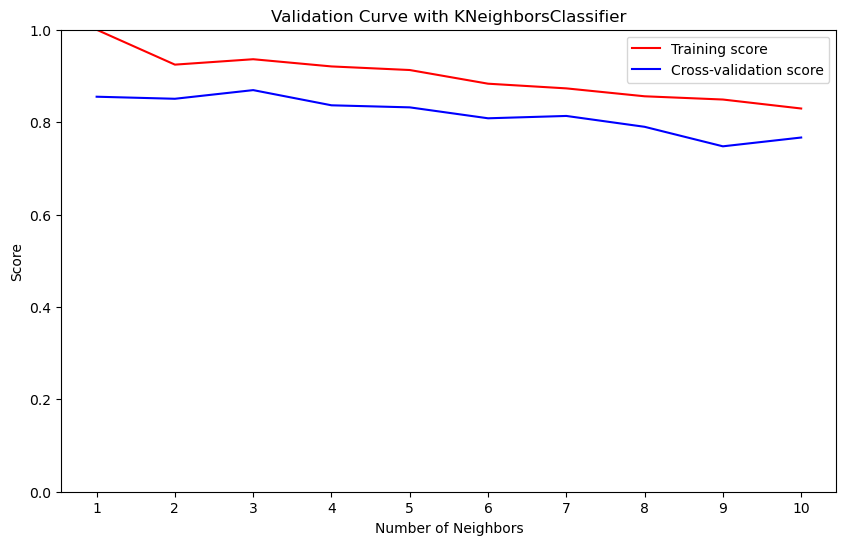

In [20]:
from sklearn.model_selection import validation_curve
neighbors_range = np.arange(1, 11)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), Xtrain_array, ytrain_array,param_name = "n_neighbors", param_range = neighbors_range,cv = 7, scoring = "accuracy")
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
valid_scores_mean = np.mean(valid_scores, axis = 1)
valid_scores_std = np.std(valid_scores, axis = 1)
plt.figure(figsize = (10, 6))
plt.title("Validation Curve with KNeighborsClassifier")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(neighbors_range)
plt.plot(neighbors_range, train_scores_mean, label = "Training score", color = "r")
plt.plot(neighbors_range, valid_scores_mean, label="Cross-validation score", color="b")
plt.legend(loc="best")
plt.show()
# 1 neighbor gives you the best traning score and 10 gives you the worst
# 3 neighbors gives you the best validation score
# I would choose 3 neighbors to best fit my model

# Question 9 (10 pts)

Re-run the KNeighbors classifier with the number of neighbors you chose in Question 8.  Generate a new classification report and compare the outcomes with that of 1 neighbor.

Solution:

In [50]:
new_classifier = KNeighborsClassifier(n_neighbors = 3)
new_classifier.fit(Xtrain_array, ytrain_array)
newest_prediction = new_classifier.predict(Xtest_array)
new_report = classification_report(ytest_array, newest_prediction)
print(new_report)
# Overall, using 3 neighbors strangely made the model perform worse than using 1 neighbors, despite what the validation curve suggests. 
# the precision, recall, and f1-score average performances all fell by roughly 6% each.

                          precision    recall  f1-score   support

      chronic dermatitis       0.88      0.75      0.81        20
           lichen planus       1.00      1.00      1.00        33
        pityriasis rosea       0.50      0.62      0.55        21
pityriasis rubra pilaris       0.89      1.00      0.94         8
               psoriasis       1.00      0.95      0.97        38
   seborrheic dermatitis       0.61      0.58      0.60        24

                accuracy                           0.83       144
               macro avg       0.81      0.82      0.81       144
            weighted avg       0.84      0.83      0.83       144



# Question 10 (5 pts)

A *confusion matrix* is a handy way to see exactly where your model is doing well and where it is doing poorly.  The diagonal shows the number of correct predictions, and the rest of the matrix shows exactly how often the model made an incorrect prediction, and in what ways.  Use the code given to generate a confusion matrix for either your 1-neighbor model or your optimal-neighbor model and answer: What was the most common mistake made by your model (predicted label vs true label)?

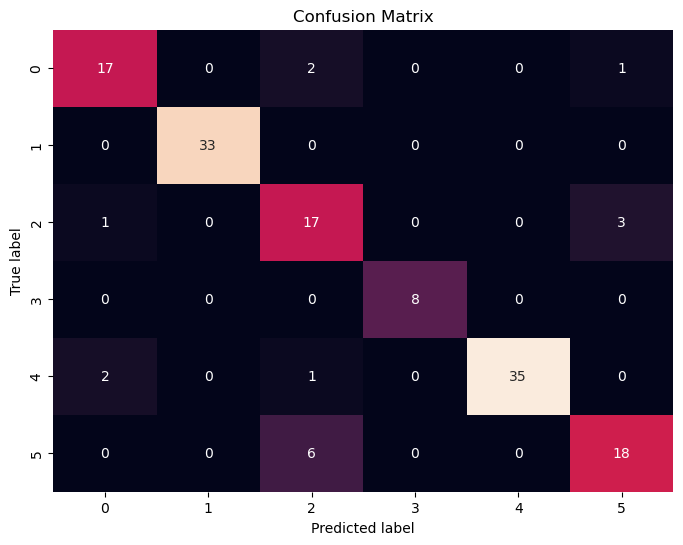

[[17  0  2  0  0  1]
 [ 0 33  0  0  0  0]
 [ 1  0 17  0  0  3]
 [ 0  0  0  8  0  0]
 [ 2  0  1  0 35  0]
 [ 0  0  6  0  0 18]]


In [58]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest_array, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot = True, cbar = False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
print(conf_matrix)
# generating confusion matrix for neighbors = 1 because of its better performance
# the model's most common mistake was predicting lichen planus when it actually was pityriasis rubra pilaris.

# Question 11 (15 pts)

Choose two other classification algorithms (either ones we used in class or others), fit the model to your train-test-split data, and find out how accurate those models are using this dataset.

Report your accuracy findings in a neat arrangement for 1-neighbor, optimal-neighbor, and your two chosen algorithms.

Then answer the following:
1. Which algorithm performed best? Which performed worst?
2. Based on what you know about the data, are these results what you would expect? Support your answer; you might consider the size of the dataset, the number of attributes, and the amount of overlap between classification outcomes.

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(Xtrain_array, ytrain_array)
dt_prediction = dt_classifier.predict(Xtest_array)
dt_report = classification_report(ytest_array, dt_prediction)
print("Decision Tree Accuracy:", dt_report)
# Random Forest
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(Xtrain_array, ytrain_array)
rf_prediction = rf_classifier.predict(Xtest_array)
rf_report = classification_report(ytest_array, rf_prediction)
print("Random Forest Accuracy:", rf_report)
# k neighbors @ 1 neighbor from earlier for comparision
print("KNeighbors = 1 Accuracy:", class_report)

# Overall, random the random forest classifier performed best in precision, recall, and f1-score.
# These results are what I would expect. There is liekly a lot of overlap between the variables that go into predicting these different diseases. This combined with the large size of the data makes random forest a great candidate for the derm_data. Decision tree performed solidly as well, however, it likely ended up overfitting the data thus having worse performance. K neighbors did the worse likely because it striuggled to account for the nuances between labels/diseases.

Decision Tree Accuracy:                           precision    recall  f1-score   support

      chronic dermatitis       1.00      1.00      1.00        20
           lichen planus       0.97      1.00      0.99        33
        pityriasis rosea       0.95      0.86      0.90        21
pityriasis rubra pilaris       1.00      0.75      0.86         8
               psoriasis       0.97      0.92      0.95        38
   seborrheic dermatitis       0.76      0.92      0.83        24

                accuracy                           0.93       144
               macro avg       0.94      0.91      0.92       144
            weighted avg       0.94      0.93      0.93       144

Random Forest Accuracy:                           precision    recall  f1-score   support

      chronic dermatitis       1.00      1.00      1.00        20
           lichen planus       1.00      1.00      1.00        33
        pityriasis rosea       0.94      0.76      0.84        21
pityriasis rubra pilaris